In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
y = dataset.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

r2_score : -0.07725769773860813
mean_squared_error : 5956.9009009009005
mean_absolute_error : 59.513513513513516


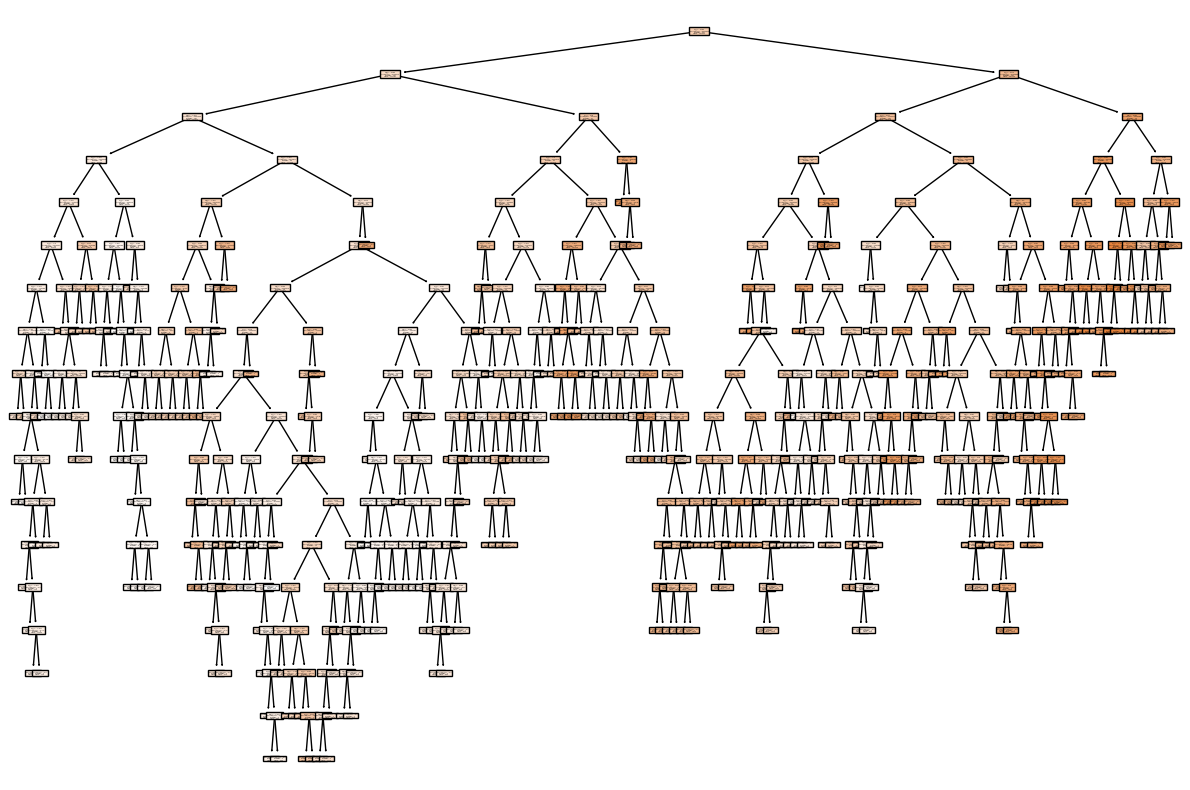

In [6]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("r2_score :", r2_score(y_test, y_pred))
print("mean_squared_error :", mean_squared_error(y_test, y_pred))
print("mean_absolute_error :", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)
plt.show()

### Hyperparameter Tuning

In [7]:
params = {

    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth" : [ 1,2,3,4,5,6,7,10,12,15,18,20,25,30],
    "max_features" : ["sqrt", "log2"]

}

In [13]:
model = DecisionTreeRegressor()
grid = GridSearchCV(model, param_grid=params, scoring="neg_mean_squared_error",cv=5)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

print("best parameters :", grid.best_params_)
print("best score :", grid.best_score_)

print("r2_score :", r2_score(y_test, y_pred))
print("mean_squared_error :", mean_squared_error(y_test, y_pred))
print("mean_absolute_error :", mean_absolute_error(y_test, y_pred))

best parameters : {'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
best score : -3902.6991655606107
r2_score : 0.36817293038929066
mean_squared_error : 3493.807700867192
mean_absolute_error : 46.108854150772316


### Re-training model with best hyperparameters

r2_score : 0.22920846583140875
mean_squared_error : 4262.238082804383
mean_absolute_error : 51.411195002367904


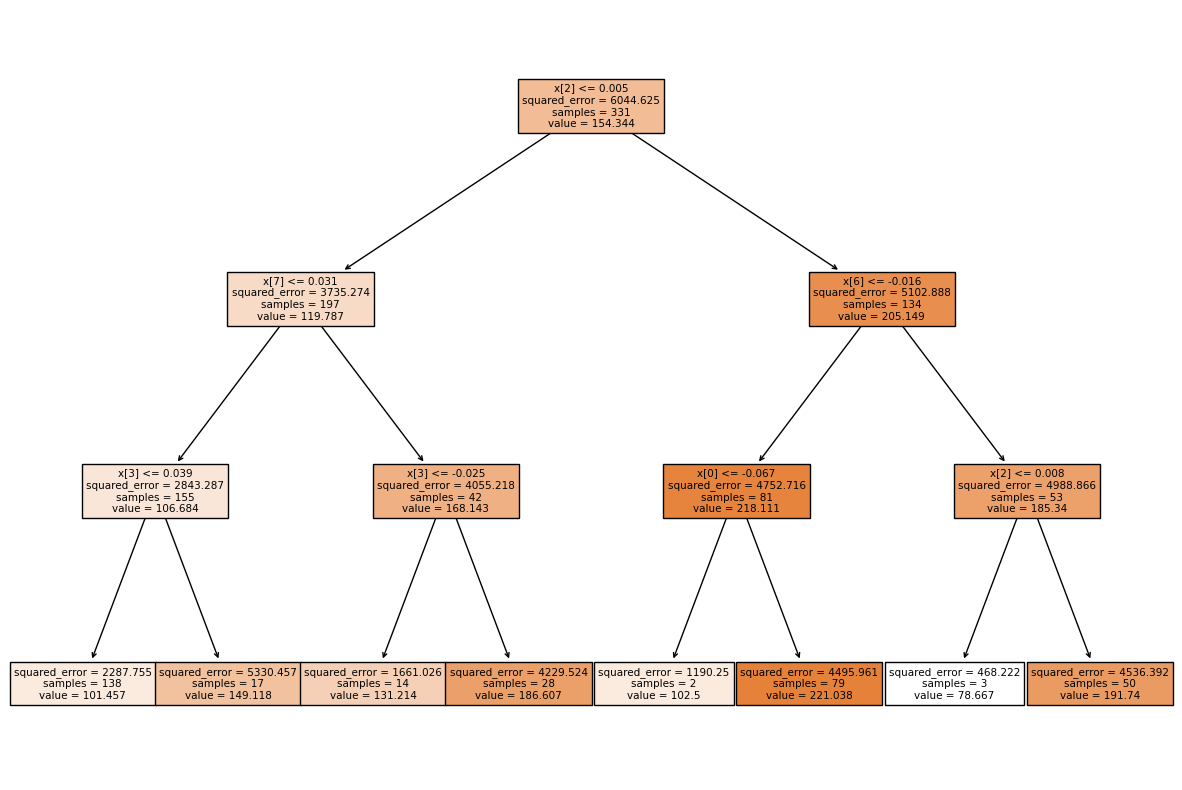

In [18]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3, max_features="log2", splitter='best')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("r2_score :", r2_score(y_test, y_pred))
print("mean_squared_error :", mean_squared_error(y_test, y_pred))
print("mean_absolute_error :", mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(model, filled=True)
plt.show()